In [23]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
iris = load_iris()
x = pd.DataFrame(iris.data , columns = iris.feature_names)
y = iris.target

target_name = iris.target_names
feature_name = iris.feature_names
print("Dataset Shape :",x.shape)
print("Feature name : " ,feature_name)
print("Target name : ",target_name)


Dataset Shape : (150, 4)
Feature name :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target name :  ['setosa' 'versicolor' 'virginica']


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
n_samples = x_train.shape[0]
print("Number of training samples:", n_samples)
indices = np.random.choice(n_samples, size=n_samples, replace=True)
x_boot = x_train.iloc[indices]
y_boot = y_train[indices]
print("Bootstrap sample indices first 10:", indices[:10])
print("Bootstrap sample shape:", x_boot.shape)

Number of training samples: 120
Bootstrap sample indices first 10: [ 31   1 104  90  13  48  31  24  70 115]
Bootstrap sample shape: (120, 4)


In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,max_features='sqrt',bootstrap=True,n_jobs=-1)
rf_model.fit(x_boot, y_boot)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [19]:
y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accurace: {accuracy:.4f}")


Accurace: 0.9333


In [22]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_name))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



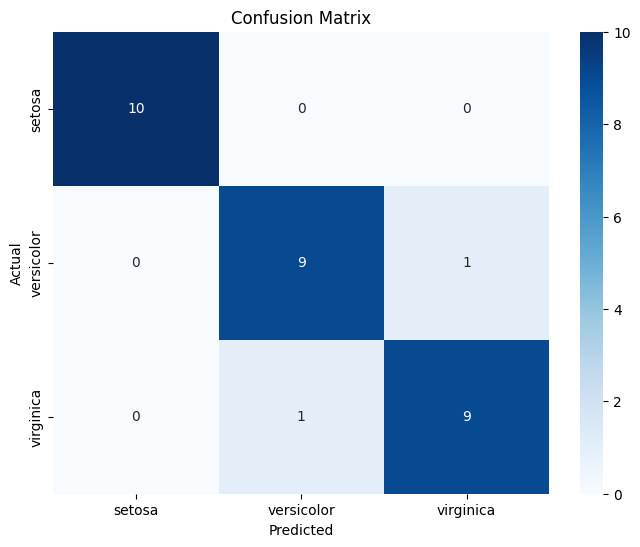

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_name, yticklabels=target_name)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

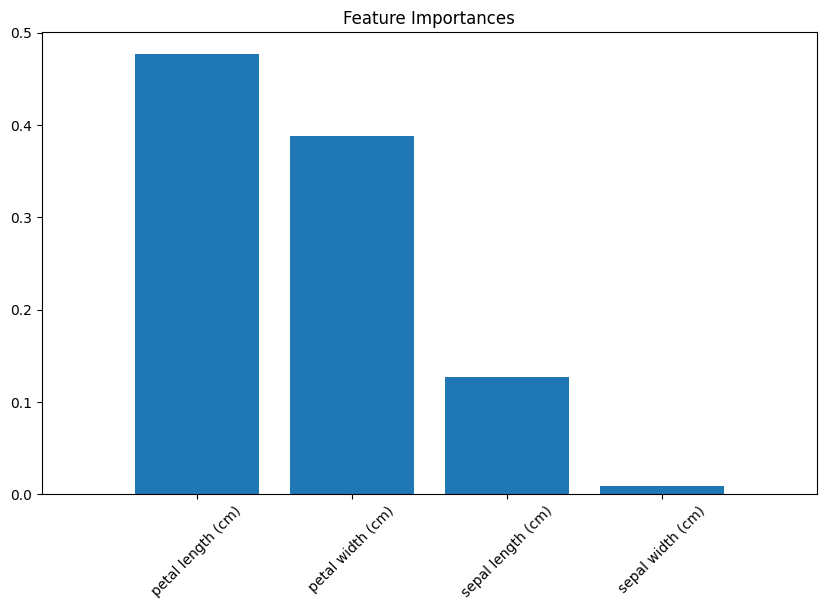

In [25]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), importances[indices], align='center')
plt.xticks(range(x.shape[1]), np.array(feature_name)[indices], rotation=45)
plt.xlim([-1, x.shape[1]])
plt.show()